___
# Ciência dos Dados - PROJETO 1

Gabriel Scodiero

## TÍTULO DO SEU PROJETO

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Análise e Resultados

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/gabiuas


In [4]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [5]:
dados13 = pd.read_csv('DOM2013csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados14 = pd.read_csv('DOM2014csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados15 = pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [82]:
df13= pd.DataFrame({"UF":dados13.UF})


#COLUNAS
df13['internet_dom']=dados13.V02322
df13['micro']=dados13.V02323
df13['celular']=dados13.V02324
df13['tablet']=dados13.V02325
df13['tv']=dados13.V02326
df13['outro']=dados13.V02327
df13['_3G_4G']=dados13.V02424
df13['discada']=dados13.V02425
df13['banda_larga']=dados13.V02426
df13['mes_domici']=dados13.V4614
df13['dom_per_capt']=dados13.V4622


#RESPOSTAS
df13.internet_dom = df13.internet_dom.astype('category')
df13.internet_dom.cat.categories = ('Sim','Não')

df13.micro = df13.micro.astype('category')
df13.micro.cat.categories = ('Sim','Não')

df13.celular = df13.celular.astype('category')
df13.celular.cat.categories = ('Sim','Não')

df13.tablet = df13.tablet.astype('category')
df13.tablet.cat.categories = ('Sim','Não')

df13.tv = df13.tv.astype('category')
df13.tv.cat.categories = ('Sim','Não')

df13.outro = df13.outro.astype('category')
df13.outro.cat.categories = ('Sim','Não')

df13._3G_4G = df13._3G_4G.astype('category')
df13._3G_4G.cat.categories = ('Sim','Não')

df13.discada = df13.discada.astype('category')
df13.discada.cat.categories = ('Sim','Não')

df13.banda_larga = df13.banda_larga.astype('category')
df13.banda_larga.cat.categories = ('Sim','Não')

df13.dom_per_capt = df13.dom_per_capt.astype('category')
df13.dom_per_capt.cat.categories = ('Zero','Zero - 1/4','1/4 - 1/2','1/2 - 1','1 - 2','2 - 3','3 - 5','5+','SD')


df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].sort_values(by="mes_domici").dropna().head(10)





,UF,internet_dom,micro,celular,tablet,tv,outro,_3G_4G,discada,banda_larga,mes_domici,dom_per_capt
66368,31,Sim,Sim,Sim,Não,Não,Não,Sim,Não,Sim,30.0,Zero - 1/4
80927,33,Sim,Sim,Não,Não,Não,Não,Não,Sim,Não,33.0,Zero - 1/4
77159,31,Sim,Sim,Sim,Não,Não,Não,Não,Não,Sim,34.0,Zero - 1/4
75948,31,Sim,Sim,Não,Não,Não,Não,Não,Não,Sim,38.0,Zero - 1/4
104737,35,Sim,Sim,Não,Não,Não,Não,Não,Não,Sim,38.0,Zero - 1/4
99658,35,Sim,Sim,Não,Não,Não,Não,Sim,Não,Não,66.0,Zero - 1/4
106782,35,Sim,Sim,Sim,Não,Não,Não,Não,Não,Sim,70.0,Zero - 1/4
84359,33,Sim,Não,Sim,Não,Não,Não,Sim,Não,Não,70.0,Zero - 1/4
84716,33,Sim,Sim,Não,Não,Não,Não,Não,Sim,Não,70.0,Zero - 1/4
91458,33,Sim,Não,Sim,Não,Não,Não,Sim,Não,Não,72.0,Zero - 1/4


In [73]:
inter = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].internet_dom
domsal = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].dom_per_capt



print('Frequências relativas Internet:')
ut1 = (inter.value_counts(normalize=True)*100).round(decimals=1).reindex(['Sim', 'Não'])
print(ut1,'\n')

print('Frequências relativas dinheiro:')
ut2 = (domsal.value_counts(normalize=True)*100).round(decimals=1).reindex(['Zero','Zero - 1/4','1/4 - 1/2','1/2 - 1','1 - 2','2 - 3','3 - 5','5+','SD'])
print(ut2,'\n')


Frequências relativas Internet:
Sim    56.2
Não    43.8
Name: internet_dom, dtype: float64 

Frequências relativas dinheiro:
Zero           0.0
Zero - 1/4     2.8
1/4 - 1/2     10.9
1/2 - 1       28.4
1 - 2         32.4
2 - 3         11.4
3 - 5          7.3
5+             6.9
SD             0.0
Name: dom_per_capt, dtype: float64 



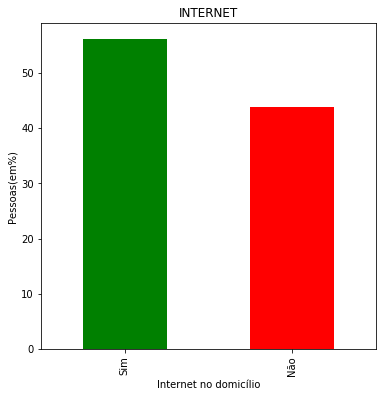

In [139]:
plot = ut1.plot(kind='bar',title='INTERNET',figsize=(6, 6),color=('g','r'))
plt.ylabel('Pessoas(em%)')
plt.xlabel('Internet no domicílio')

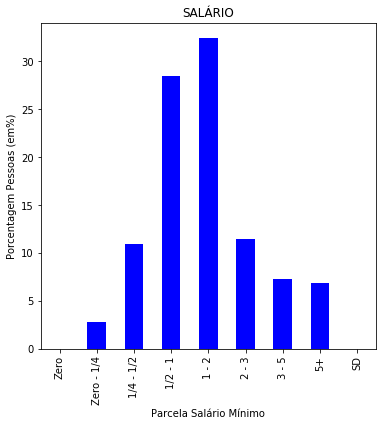

In [140]:
plot = ut2.plot(kind='bar',title='SALÁRIO',figsize=(6, 6),color=('b'))
plt.ylabel('Porcentagem Pessoas (em%)')
plt.xlabel('Parcela Salário Mínimo')

In [76]:
inter = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].internet_dom
sal = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].dom_per_capt


print('Tabela Cruzada por total GERAL (em %):')
ct1=(pd.crosstab(sal,inter,margins=True,rownames=['Salário'], colnames=["Internet"], normalize='all')*100).round(decimals=1)
ct1

Tabela Cruzada por total GERAL (em %):


Internet,Sim,Não,All
Salário,,,
Zero,0.0,0.0,0.0
Zero - 1/4,0.7,2.1,2.8
1/4 - 1/2,3.9,7.0,10.9
1/2 - 1,13.0,15.4,28.4
1 - 2,18.8,13.6,32.3
2 - 3,7.9,3.5,11.4
3 - 5,6.0,1.4,7.4
5+,6.1,0.9,6.9
SD,0.0,0.0,0.0


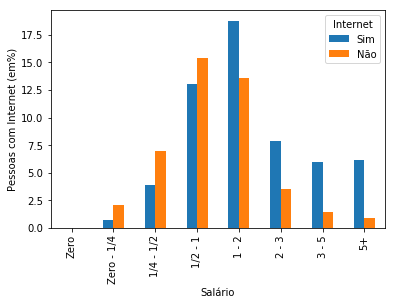

In [77]:
plot = ct1.iloc[0:8,0:2].plot(kind='bar')
plt.ylabel('Pessoas com Internet (em%)')

In [12]:
renda = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].mes_domici  

renda.describe()

count     32669.000000
mean       3340.177416
std        4475.929620
min           2.000000
25%        1350.000000
50%        2100.000000
75%        3700.000000
max      180678.000000
Name: mes_domici, dtype: float64

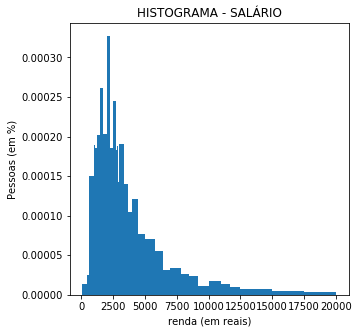

In [78]:
# Histograma
faixa = arange(0,30000,350)
faixa2 = (100,300,500,650,1000,1100,1250,1500,1700,2000,2250,2500,2700,2800,2900,3000,3400,3700,4000,4500,5000,5800,6400,7000,7800,8500,9200,10000,11000,11700,12500,15000,17500,20000)
plot = renda.plot.hist(bins=faixa2,title='HISTOGRAMA - SALÁRIO',figsize=(5, 5), normed=1, alpha=1)
plt.ylabel('Pessoas (em %)')
plt.xlabel('renda (em reais)')

In [152]:

#tipo = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].internet_dom
#aparelho_1 = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)]._3G_4G
#aparelho_2= df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].discada
#aparelho_3 = df13[((df13.UF==31)|(df13.UF==32)|(df13.UF==33)|(df13.UF==35))&(df13.mes_domici>0.1)&(df13.mes_domici!=999999999999)].banda_larga
#ct2 = pd.crosstab(aparelho_1,tipo, rownames=['aparelho_1'], colnames=['tipo'])
#ct3 = pd.crosstab(aparelho_2,tipo, rownames=['aparelho_2'], colnames=['tipo'])
#ct4 = pd.crosstab(aparelho_3,tipo, rownames=['aparelho_3'], colnames=['tipo'])




In [153]:
#ct2

In [154]:
#ct3

In [155]:
#ct4

## ## Conclusão 

Descreva aqui suas conclusões!

Como o acesso, da população do Sudeste, a internet, varia conforme sua renda?

Por qual ferramenta a população do Sudeste acessa a internet?

Qual o tipo de internet a populacão usa?

In [ ]:
df13.to_csv("Data_13.csv",sep=';')